# Quantum Harmonic Oscillator Simulation

This experiment simulates the probability density of a quantum particle in a 1D harmonic potential well, visualizing the stationary states for a chosen energy level.

## What is Simulated
- The probability density of a quantum harmonic oscillator.
- Stationary wavefunctions for a selected energy level (n=1 by default).
- The behavior of a quantum particle bound in a potential well.

## How to Run
1. Set the desired energy level (`n`).
2. Run the notebook to generate the animated probability density plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math
from IPython.display import HTML

In [2]:
# Constants
hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
m = 9.10938356e-31    # Electron mass (kg)
omega = 1e13          # Angular frequency (rad/s)

In [3]:
# Define the wavefunction (1D harmonic oscillator)
def psi(n, x):
    normalization = 1.0 / np.sqrt(2.0**n * math.factorial(n)) * (m * omega / (np.pi * hbar))**0.25
    Hn = np.polynomial.hermite.Hermite(n)  # Hermite polynomial for nth state
    return normalization * Hn(x) * np.exp(-0.5 * (x**2))

In [4]:
# Initialize animation function
def init():
    line.set_data([], [])
    return line,

In [5]:
# Setup the position space
x = np.linspace(-5, 5, 500)

# Calculate the initial wavefunction for the chosen energy level
n = 5  # Starting with ground state
wavefunction = psi(n, x)
prob_density = np.abs(wavefunction)**2

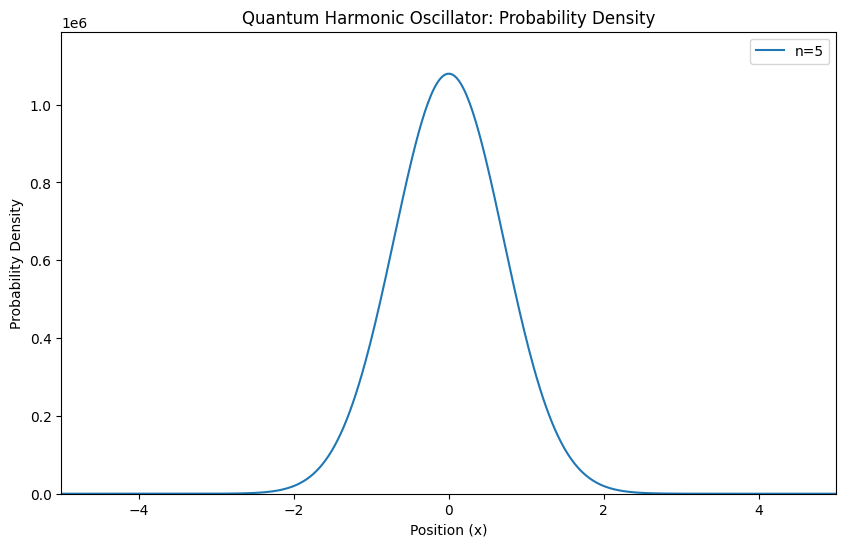

In [6]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, prob_density, label=f"n={n}")
ax.set_xlim(-5, 5)
ax.set_ylim(0, np.max(prob_density) * 1.1)
ax.set_title("Quantum Harmonic Oscillator: Probability Density")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density")
ax.legend()

In [7]:
# Animation update function
def update(frame):
    global n, x
    wavefunction = psi(n, x)
    prob_density = np.abs(wavefunction)**2
    line.set_ydata(prob_density)
    
    # Update energy level (n) to show higher states
    if frame % 50 == 0 and n < 5:  # Increase n every 50 frames for visualization
        n += 1
    
    return line,

In [8]:
# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=200, interval=100, blit=True
)

In [9]:
# Display animation in HTML format
HTML(ani.to_jshtml())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f005ecdb-da4f-4484-8639-0db890a640f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>